# Setup

- Download Spark 2.2, unpack to /opt/spark (or anywhere)
- Set SPARK_HOME var to /opt/spark (or where it was unpacked to)
- Download BigDL 0.7, unpack anywhere
- Set BIGDL_HOME var to unpacked BigDL directory
- do `pip install bigdl==0.7` somewhere
- download https://gist.github.com/lukovnikov/461d1165ea04317d2be6b66995ffa73c
- start jupyter using the script (must be marked as executable)

In [1]:
import pyspark
from pyspark import SparkContext
import numpy as np
import re
import struct
import gzip
import matplotlib as mpl
from matplotlib import pyplot as plt

from bigdl.util.common import *

In [2]:
init_engine()

In [3]:
pyspark.__version__

'2.2.3'

In [4]:
from bigdl.nn.layer import *
from bigdl.nn.criterion import *
from bigdl.optim.optimizer import *
from bigdl.util.common import *
from bigdl.util.common import Sample
from bigdl.dataset.transformer import *

# MNIST classification with MLP

## Loading data

In [57]:
def load_mnist(p="mnist/"):
    def read_idx(filename):      # loads mnist into numpy array
        with gzip.open(filename) as f:
            zero, data_type, dims = struct.unpack('>HBB', f.read(4))
            shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
            return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)
    train_data = read_idx(p+"train-images-idx3-ubyte.gz")
    train_labels = read_idx(p+"train-labels-idx1-ubyte.gz")
    test_data = read_idx(p+"t10k-images-idx3-ubyte.gz")
    test_labels = read_idx(p+"t10k-labels-idx1-ubyte.gz")
    
    train_mean, train_std = np.mean(train_data), np.std(train_data)
    train_imgs, train_lbls = sc.parallelize(train_data), sc.parallelize(train_labels)
    test_imgs, test_lbls = sc.parallelize(test_data), sc.parallelize(test_labels)
    train_rdd = train_imgs.zip(train_lbls).map(lambda x: 
                                               Sample.from_ndarray((x[0] - train_mean)/train_std, x[1]+1))
    test_rdd= test_imgs.zip(test_lbls).map(lambda x: 
                                               Sample.from_ndarray((x[0] - train_mean)/train_std, x[1]+1))
    return train_rdd, test_rdd

mnist_train_rdd, mnist_test_rdd = load_mnist()

/home/denis/conda/envs/spark/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


### Show data sample

[5.0, 0.0, 4.0, 1.0, 9.0, 2.0, 1.0, 3.0]


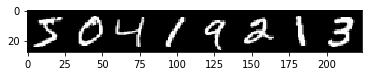

In [58]:
selection = mnist_train_rdd.take(8)
plt.imshow(np.column_stack([np.array(s.features[0].to_ndarray()).reshape(28,28) 
                            for s in selection]),cmap='gray')
#plt.axis('off')
print([float(s.label.to_ndarray()) - 1 for s in selection])

## Hyperparams

In [59]:
# Parameters
learning_rate = 0.2
training_epochs = 15
batch_size = 2048

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

## Model

TODO:
- define simple model consisting of three linear layers with Tanh activation functions in between them, and finally, add a log-softmax layer
    - (tip: don't forget to add a reshape layer for input)

## Optimizer

TODO:
- define optimizer with the model, training data and other settings defined above (Hyperparams)

TODO:
- train the model

## Evaluate trained model on test data

TODO:
- compute classification accuracy over both test and train datasets
    - (tip: check "metrics" in "API Guide")